# "Hello World" du DL - Reconnaissance de chiffre 0 à 9

## 1. modules / données à charger
(la BDD MNIST peut être chargée sous TF, Kaggle ou est déjà pré-installé dans colab)


In [1]:
#!/usr/bin/python3

import numpy as np
from tensorflow import keras
# from tensorflow.keras import backend as K
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

## 2. Création des données et adaptation du format pour Keras

In [2]:
(X_train_data, Y_train_data), (X_test_data, Y_test_data) = mnist.load_data()

N = X_train_data.shape[0]  # 60 000 données

print(X_train_data[0].shape)
# print(X_train_data[0])

X_train = np.reshape(X_train_data,(N,784))  # vecteur image
X_test = np.reshape(X_test_data,(X_test_data.shape[0],784))

X_train = X_train/255  # normalisation
X_test = X_test/255

print(X_train[0].shape)
print(X_test[0].shape)

Y_train = to_categorical(Y_train_data, num_classes=10)
Y_test = to_categorical(Y_test_data, num_classes=10)

print(Y_train[0])
print(Y_train_data[0])

11490434/11490434 [==============================] - 1s 0us/step
(28, 28)
(784,)
(784,)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


## 3. Construction du Réseau de neurones

In [3]:
p = 8

modele = Sequential()

# Première couche : p neurones (entrée de dimension 2)
modele.add(Dense(p, input_dim=784, activation='sigmoid'))

# Deuxième couche : q neurones
modele.add(Dense(p, activation='sigmoid'))

# Couche de sortie : 1O neurone
modele.add(Dense(10, activation='softmax'))

# Descente de gradient
modele.compile(loss='categorical_crossentropy', 
              optimizer='sgd',  
              metrics=['accuracy'])

print(modele.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 6280      
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
None


## 4. Entrainement du modèle pour le calculd des poids

In [4]:
# Calcul des poids
modele.fit(X_train, Y_train, batch_size=32, epochs=4, verbose=1)

Epoch 1/4
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2696 - accuracy: 0.1902
Epoch 2/4
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1038 - accuracy: 0.2935
Epoch 3/4
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8699 - accuracy: 0.3572
Epoch 4/4
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6606 - accuracy: 0.4623


## 5. Analyse des résultats

In [5]:
score = modele.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.565698504447937
Test accuracy: 0.5300999879837036


## 6. fonction de Visualisation pour un essai de prédiction

In [6]:
def affiche_chiffre_train(i):
    plt.imshow(X_train_data[i], cmap='Greys')
    plt.title('Attendu %d' % Y_train_data[i])
    plt.show()

    return

## 7. Essai pour le choix d'une image

313/313 [==============================] - 0s 1ms/step
Sortie réseau [0.03472625 0.02561564 0.02207739 0.0416713  0.17684548 0.06768325
 0.07792963 0.26558122 0.04465409 0.24321577]
Chiffre attendu : 7
Chiffre prédit : 7


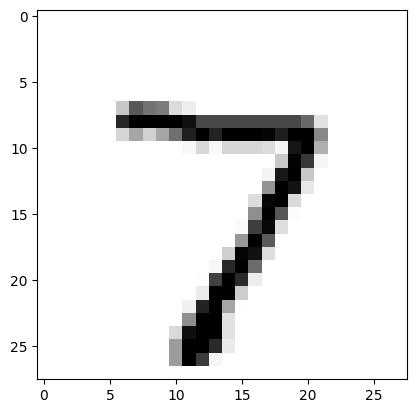

In [9]:
# Prédiction sur les données de test
Y_predict = modele.predict(X_test)

# Un exemple
i = 0  # numéro de l'image 

chiffre_predit = np.argmax(Y_predict[i]) # prédiction par le réseau

print("Sortie réseau", Y_predict[i])
print("Chiffre attendu :", Y_test_data[i])
print("Chiffre prédit :", chiffre_predit)

plt.imshow(X_test_data[i], cmap='Greys')  
plt.show()

## 8. Essai pour le choix de 10 images

313/313 [==============================] - 0s 1ms/step

 --- Image numéro 0
Sortie réseau [0.035 0.026 0.022 0.042 0.177 0.068 0.078 0.266 0.045 0.243]
Chiffre attendu : 7


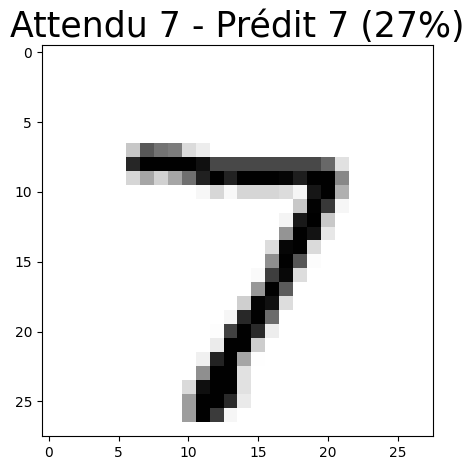


 --- Image numéro 1
Sortie réseau [0.147 0.112 0.215 0.115 0.014 0.121 0.08  0.03  0.154 0.014]
Chiffre attendu : 2


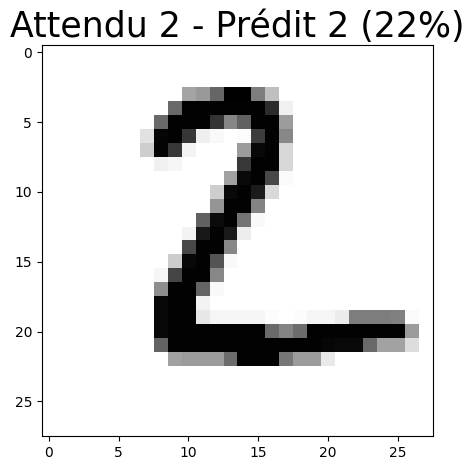


 --- Image numéro 2
Sortie réseau [0.034 0.373 0.06  0.271 0.01  0.061 0.031 0.043 0.101 0.016]
Chiffre attendu : 1


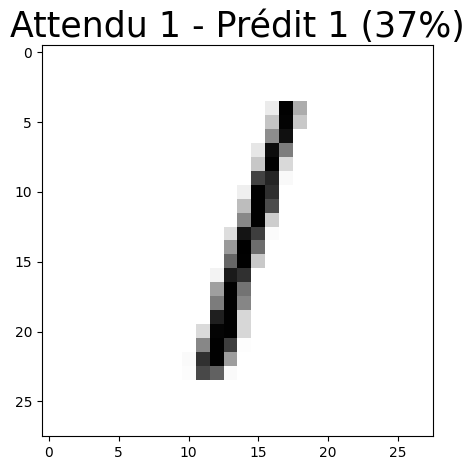


 --- Image numéro 3
Sortie réseau [0.231 0.021 0.183 0.029 0.052 0.12  0.166 0.048 0.11  0.04 ]
Chiffre attendu : 0


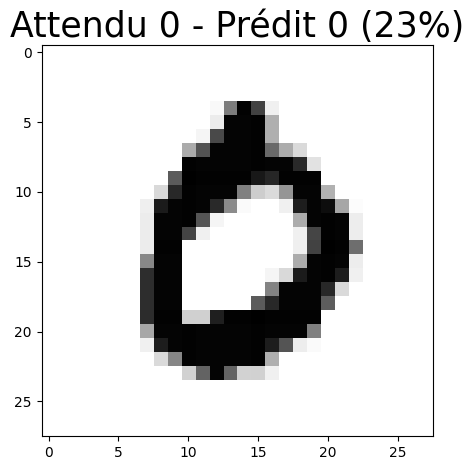


 --- Image numéro 4
Sortie réseau [0.056 0.008 0.031 0.014 0.265 0.055 0.131 0.186 0.036 0.217]
Chiffre attendu : 4


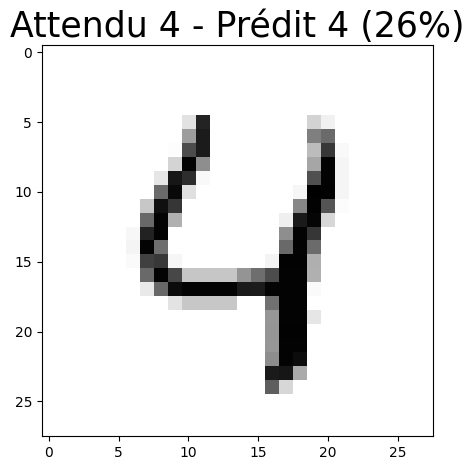


 --- Image numéro 5
Sortie réseau [0.028 0.402 0.049 0.291 0.008 0.055 0.024 0.039 0.09  0.015]
Chiffre attendu : 1


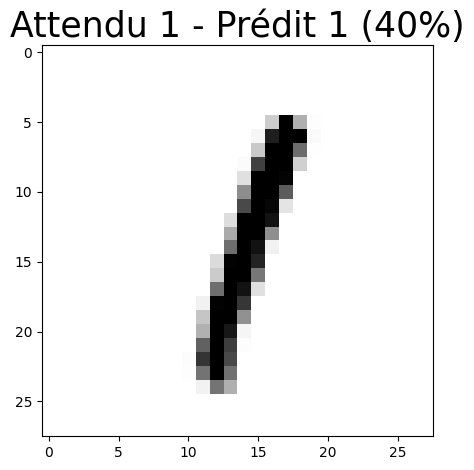


 --- Image numéro 6
Sortie réseau [0.034 0.018 0.02  0.03  0.203 0.06  0.082 0.257 0.039 0.256]
Chiffre attendu : 4


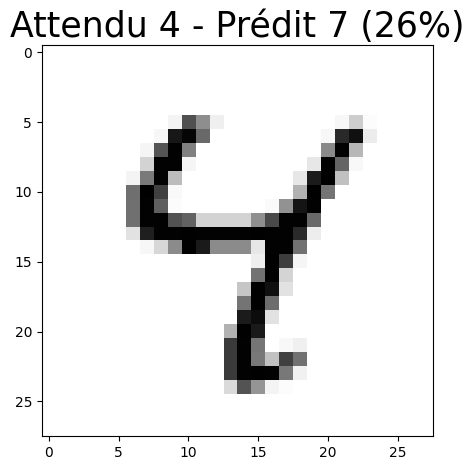


 --- Image numéro 7
Sortie réseau [0.034 0.021 0.022 0.032 0.208 0.056 0.085 0.255 0.039 0.247]
Chiffre attendu : 9


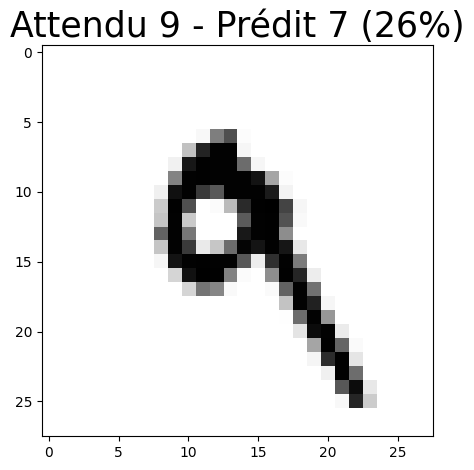


 --- Image numéro 8
Sortie réseau [0.196 0.017 0.148 0.023 0.091 0.102 0.194 0.069 0.096 0.064]
Chiffre attendu : 5


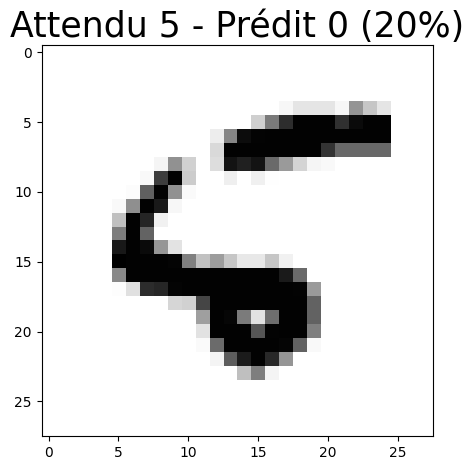


 --- Image numéro 9
Sortie réseau [0.029 0.009 0.015 0.015 0.264 0.042 0.084 0.239 0.025 0.279]
Chiffre attendu : 9


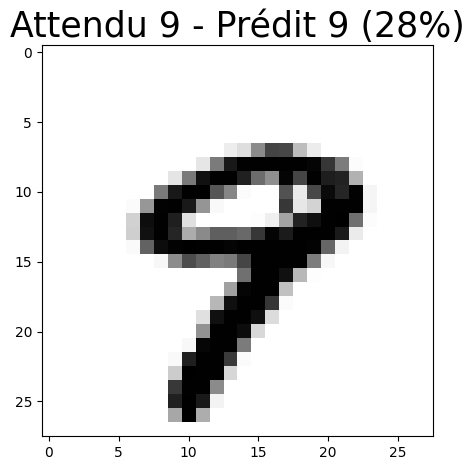

In [8]:
# affiche_chiffre_train(0)

Y_predict = modele.predict(X_test)

# print(Y_predict[0])

def affiche_chiffre_test(i):
    plt.imshow(X_test_data[i], cmap='Greys')
    chiffre_predit = np.argmax(Y_predict[i])
    perc_max = round(100*np.max(Y_predict[i]))
    # '{:.1%}'.format(1/3.0)
    print("\n --- Image numéro", i)
    with np.printoptions(precision=3, suppress=True):
        print("Sortie réseau", Y_predict[i])
    print("Chiffre attendu :", Y_test_data[i])
    

    plt.title('Attendu %d - Prédit %d (%d%%)' % (Y_test_data[i], chiffre_predit, perc_max), fontsize=25)
    plt.tight_layout()
    # plt.savefig('tf2-chiffre-test-result-%d.png' %i)
    plt.show()

    return

for i in range(10):
    affiche_chiffre_test(i)


# F0 = [0.001, 0.000, 0.000, 0.008, 0.002, 0.005, 0.000, 0.965, 0.000, 0.020]

# F8 = [0.001, 0.000, 0.011, 0.000, 0.081, 0.009 0.881, 0.000, 0.013, 0.004]

# print(F0)
# print(F8)


# sigmoid-sigmoid-softmax, standard sgd, batch=32, epochs=40
# p / neurones / poids / accuracy train / accuracy test
# p = 8, 26/6442 90.3% 90.0%
# p = 10, 30/8070 91.6% 91.4%
## p = 15, 40/12175 92.8%, 92.6%
# p = 20, 50/16330 93.4% 93.4%
# p = 50, 110/42310 94.4% 94.4%